In [5]:
from math import sqrt, pow, pi
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## References
* Cumming, A., Marcy, G. W., & Butler, R. P. 1999, ApJ, 526, 890
* Kasting, J. F., Whitmire, D. P., & Reynolds, R. T. 1993, Icarus, 101, 108
* Perryman, M. 2011, The Exoplanet Handbook, Cambridge University Press, New York; ISBN: 0521765595

In [25]:
# Kepler-20b values
# M☉ = (1.98855±0.00025)×10^30 kg mass of Sol
#constants
solrad = 0.00465047 # Sol radius in au
juprad = 0.000477895 # Jupiter radius in au

# inputs
d = 242 # distance in parsecs to stellar body - ps = 648000 au / 𝛑
msun = 1.01 # msun in sol unit
srad = 1.06 # stellar radius in sol unit
teff = 5800  # effective stellar temp in k
a = .05211  # semi major axis of orbit in au
msini = 0.3 # mass of planet in jupiter units
prad = 1.07 # planetary radius in jupiter units
e = .5 # eccentricity

# given (note period and angv can be calculated as below section shows)
period = 4.322482 # period in earth days (365.25 per year)
wgamma = 90 # degs from ascending node to periapsis
radv = 37.2 # radial velocity m/s semiamplitude

# derived - source https://exoplanetarchive.ipac.caltech.edu/docs/poet_calculations.html
orbital_period_years = sqrt(pow(a,3)*(1/msun))
orbital_period_days = orbital_period_years * 365.25
b = a*sqrt(1-e*e) # semi minor axis in au
rp = a*(1-e) # radius of periapsis in au
ra = a*(1+e) # radius of apoasis in au
c = e * a
lum = pow(srad,2)*pow(teff/5777,4) # stellar luminosity in sol unit

# habital zones in au
rhabinner = .75 * sqrt(lum)
rhabcenter = sqrt(lum)
rhabouter = 1.77 * sqrt(lum)
# Astrometric semi-amplitude in au 
astamp = 954.3 * (msini/msun) * (a/d)
# transit depth as % of ratio projected planet area to sun area
tdepth = 1.049 * pow(prad/srad,2) if prad<srad else 100


In [26]:
tdepth

100

In [27]:
astamp

0.061036625071598065

In [28]:
rp

0.026055

In [29]:
ra

0.078165

In [30]:
rhabinner

0.801342876608125

In [31]:
orbital_period_years

0.011836435145827738

In [32]:
orbital_period_days

4.323257937013581

In [14]:
t1 = 203*pow(orbital_period_days,-1.0/3.0)

In [15]:
t2 = msini / pow(msun+9.548e-4*msini,2.0/3.0)

In [16]:
t3 = 1/sqrt(1-e*e)

In [17]:
radial_velocity_semiamp_mpersec = t1*t2*t3
radial_velocity_semiamp_mpersec

85.18054746983191

In [18]:
t = np.arange(0,2*pi+(2*pi/90),2*pi/90)

In [19]:
x = a*np.cos(t)

In [20]:
y = b*np.sin(t)

In [21]:
from matplotlib.patches import Circle

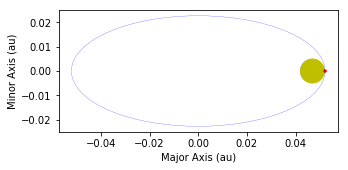

In [22]:
plt.figure(figsize=(5,5))
plt.axes().set_aspect('equal')
#plt.ylim(-rhabinner,rhabinner)
#plt.xlim(-rhabinner,rhabinner)
plt.xlabel("Major Axis (au)")
plt.ylabel("Minor Axis (au)")
plt.plot(x,y,lw=.2,color='b')
sun = Circle((c,0),srad*solrad)
sun.set_color('y')
planet = Circle((c+rp,0),prad*juprad)
planet.set_color('r')
plt.axes().add_artist(sun)
plt.axes().add_artist(planet)
plt.show();
